In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mSize = [400,400]
x = np.arange(-mSize[1]/2, mSize[1]/2)
y = np.arange(-mSize[1]/2, mSize[1]/2)
xx, yy = np.meshgrid(x, y, sparse=True)


z = np.sqrt(xx**2 + yy**2)
h = plt.imshow(z)
plt.colorbar()
plt.show()

In [ ]:
gCycles = 5
vSin = np.sin(x/mSize[1]*gCycles*np.pi*2)

In [ ]:
plt.plot(vSin)

In [ ]:
plt.imshow(np.tile(vSin,(mSize[1],1)))

In [ ]:
def genSinusoid(sz, A, omega, rho):
    # Generate Sinusoid grating
    # sz: size of generated image (width, height)
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1)) # a BUG is fixed in this line

    stimuli = A * np.cos(omega[0] * x  + omega[1] * y + rho)
    return stimuli

theta = np.pi/4
omega = [np.cos(theta), np.sin(theta)]
sinusoidParam = {'A':1, 'omega':omega, 'rho':np.pi/2, 'sz':(60,60)}
myimshow(genSinusoid(**sinusoidParam)) 
# ** is a special syntax in python, which enables passing a key-value dictionary as parameter

**This is the definition of a Gabor filter:**
$$g(x,y;\lambda,\theta,\phi,\sigma,\gamma) = \exp{\big (-\frac{x'^2+\gamma^2 y'^2}{2\sigma^2}\big )} \cos{\big ( 2 \pi\frac{x'}{\lambda}+\phi \big ) }$$
where
$$x' = x \cos{\theta} + y \sin{\theta}$$
$$y' = -x \sin{\theta} + y \cos{\theta}$$

x and y are the spatial locations of your data points

$\lambda$ sets the cosine grating frequency

$\theta$ sets the orientation (in radians) of the grating

$\phi$ sets the phase offset of the grating

$\sigma$ sets the width of the Gaussian (its std)

$\gamma$ sets the ellipticity of the Gaussian mask



In [ ]:
# Import python library for this notebook
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function
import time

# show figures inline
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure(figsize=(4,4),dpi=300);
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

In [ ]:
def torGabor(size, lambd, theta, phi, sigma, gamma, contrast, offset, angle, func=np.cos):
    radius = (int(size[0]/2.0), int(size[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))
    
    # Calculate spatial offset of stimulus
    x11 = np.sin(2 * np.pi * angle) * offset
    y11 = np.cos(2 * np.pi * angle) * offset
    
    # Calculate  orientation of stimulus
    x1 = (x-x11) * np.cos(theta) + (y-y11) * np.sin(theta)
    y1 = -(x-x11) * np.sin(theta) + (y-y11) * np.cos(theta)
    
    # Calculate the filter
    filtG = contrast * (np.exp(-(x1**2 + gamma**2 * y1**2)/(2 * sigma**2)) # Gaussian component
                        * func(2 * np.pi * (x1 / lambd) + phi)) # Cosine/sine component
    
    return filtG
#g = torGabor((512,512),50,.2,i,25,.65,1,100,.3)
#plt.show()
#myimshow(g)

fig = plt.figure(figsize=(400,400))
plt.show()
for i in range(100):
    g = torGabor((512,512),50,.2,i,25,.65,1,100,.3)

    #g[np.abs(g) < .0001] = 0
    fig.subplots(1,1)
    plt.imshow(g)

    plt.clim((-1,1))
    plt.pause(0.05)


In [ ]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * (2* x1**2 + y1**2))
    #myimshow(gauss)
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
    #myimshow(sinusoid)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((512,512), 0.1, np.pi/20, func=np.cos, K = 2) 
# change func to "cos", "sin" can generate sin gabor or cos gabor, here we pass a function name as a parameter
myimshow(g)
np.mean(g)

In [ ]:
from IPython.html.widgets import interact, interactive, fixed
def demoGabor(theta, omega):
    myimshow(genGabor((256,256), omega, theta))
interact(demoGabor, theta=(0,np.pi,np.pi/8), omega=(0.1,.3,0.1))

In [ ]:
## I don't like this one
import numpy as np

def gabor_fn(sigma, theta, Lambda, psi, gamma):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 5 # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation 
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

In [ ]:
plt.imshow(gabor_fn(10, 1, 10, 10, 20))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

In [1]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

In [2]:
N_samples = 25
x_min = -5
x_max = 5
x1= np.linspace(x_min,x_max,N_samples*5)
x= np.random.choice(x1,size=N_samples)
noise_std=1
noise_mean=0
noise_magnitude = 2

In [3]:
def func_gen(N_samples,x_min,x_max,noise_magnitude,noise_sd,noise_mean):
    x1= np.linspace(x_min,x_max,N_samples*5)
    x= np.random.choice(x1,size=N_samples)
    y=2*x-0.6*x**2+0.2*x**3+18*np.sin(x)
    y1=2*x1-0.6*x1**2+0.2*x1**3+18*np.sin(x1)
    y= y+noise_magnitude*np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    plt.figure(figsize=(8,5))
    plt.plot(x1,y1,c='k',lw=2)
    plt.scatter(x,y,edgecolors='k',c='yellow',s=60)
    plt.grid(True)
    plt.show()
    return (x,y,x1,y1)

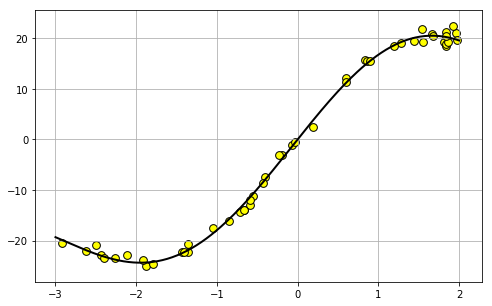

In [9]:
p=interactive(func_gen,N_samples={'Low (50 samples)':50,'High (200 samples)':200},x_min=(-5,0,1), x_max=(0,5,1),
              noise_magnitude=(0,5,1),noise_sd=(0.1,1,0.1),noise_mean=(-2,2,0.5))
display(p)


In [5]:
x,y,x1,y1 = p.result

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [7]:
lasso_eps = 0.01
lasso_nalpha=20
lasso_iter=3000
ridge_alphas = (0.001,0.01,0.1,1)

def func_fit(model_type,test_size,degree):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=55)
    
    if (model_type=='Linear regression'):
        model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                          LinearRegression(normalize=True))
    if (model_type=='LASSO with CV'):    
        model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                              LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
        
    if (model_type=='Ridge with CV'):    
        model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                              RidgeCV(alphas=ridge_alphas,normalize=True,cv=5))
    
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
    
    model.fit(X_train,y_train)
    
    train_pred = np.array(model.predict(X_train))
    train_score = model.score(X_train,y_train)
    
    test_pred = np.array(model.predict(X_test))
    test_score = model.score(X_test,y_test)
    
    RMSE_test=np.sqrt(np.mean(np.square(test_pred-y_test)))
    RMSE_train=np.sqrt(np.mean(np.square(train_pred-y_train)))
       
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    plt.title("Test set performance\nTest score: %.3f"%(test_score),fontsize=16)
    plt.xlabel("X-test",fontsize=13)
    plt.ylabel("y-test",fontsize=13)
    plt.scatter(X_test,y_test,edgecolors='k',c='blue',s=60)
    plt.scatter(X_test,test_pred,edgecolors='k',c='yellow',s=60)
    plt.grid(True)
    plt.legend(['Actual test values','Predicted values'])
    
    plt.subplot(1,2,2)
    plt.title("Training set performance\nTraining score: %.3f"%(train_score),fontsize=16)
    plt.xlabel("X-train",fontsize=13)
    plt.ylabel("y-train",fontsize=13)
    plt.scatter(X_train,y_train,c='blue')
    plt.scatter(X_train,train_pred,c='yellow')
    plt.grid(True)
    plt.legend(['Actual training values','Fitted values'])
    
    plt.show()
       
    return (train_score,test_score)

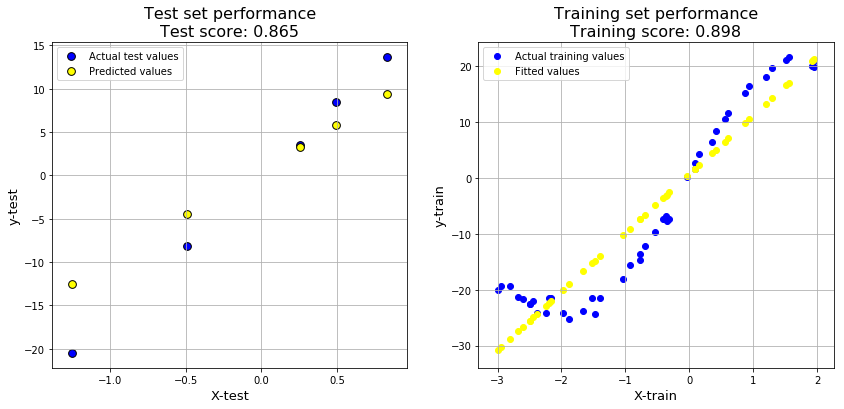

In [8]:
style = {'description_width': 'initial'}
# Continuous_update = False for IntSlider control to stop continuous model evaluation while the slider is being dragged
m = interactive(func_fit,model_type=widgets.RadioButtons(options=['Linear regression','LASSO with CV', 'Ridge with CV'],
                                                    description = "Choose Model",style=style,
                                                        layout=Layout(width='250px')),
                test_size=widgets.Dropdown(options={"10% of data":0.1,"20% of data":0.2, "30% of data":0.3,
                                                    "40% of data":0.4,"50% of data":0.5},
                                          description="Test set size ($X_{test}$)",style=style),
               degree=widgets.IntSlider(min=1,max=10,step=1,description= 'Polynomial($\sum\limits_{i=1}^n a_nx^n$)',
                                       style=style,continuous_update=False))

# Set the height of the control.children[-1] so that the output does not jump and flicker
output = m.children[-1]
output.layout.height = '450px'

# Display the control
display(m)